Build Feedforward neural networks with Keras and TensorFlow for classification of CIFAR10 image dataset using the following steps:
    a. Import the necessary packages
    b. Load the training and testing data 
    c. Define the network architecture using Keras 
    d. Train the model using SGD/Adam optimizer
    e. Evaluate the network  
    f. Plot the training loss and accuracy

a. Import the necessary packages

In [9]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

b. Load the training and testing data 

In [10]:
((X_train, Y_train), (X_test, Y_test)) = cifar10.load_data()
#Reshape so that for each image we will have one single array
X_train = X_train.reshape((X_train.shape[0], 32 * 32 * 3))
X_test = X_test.reshape((X_test.shape[0], 32 * 32 * 3)) 
# normalize to range 0-1
X_train = X_train.astype("float32") / 255.0 
X_test = X_test.astype("float32") / 255.0

In [11]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

c. Define the network architecture using Keras 

In [12]:
model = Sequential()
model.add(Dense(92, input_shape=(3072,), activation="relu"))
model.add(Dense(46, activation="relu"))
model.add(Dense(10, activation="softmax"))

d. Train the model using SGD/Adam optimizer

In [13]:
sgd = SGD(0.01) #Inside the function Learning rate is given
epochs=11

#Used as a loss function for multi-class classification model where there are two or more output labels. 
#The output label is assigned one-hot category encoding value in form of 0s and 1. 
#The output label, if present in integer form, is converted into categorical encoding using 
#keras.utils to_categorical method.
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

2022-11-12 19:36:25.275380: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/11
376/391 [===========================>..] - ETA: 0s - loss: 2.0498 - accuracy: 0.2636

2022-11-12 19:36:29.701774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


391/391 [==============================] - 5s 10ms/step - loss: 2.0439 - accuracy: 0.2657 - val_loss: 1.9413 - val_accuracy: 0.2932
Epoch 2/11
391/391 [==============================] - 1s 4ms/step - loss: 1.8721 - accuracy: 0.3347 - val_loss: 1.8375 - val_accuracy: 0.3348
Epoch 3/11
391/391 [==============================] - 2s 5ms/step - loss: 1.8004 - accuracy: 0.3652 - val_loss: 1.7865 - val_accuracy: 0.3627
Epoch 4/11
391/391 [==============================] - 2s 5ms/step - loss: 1.7532 - accuracy: 0.3808 - val_loss: 1.7262 - val_accuracy: 0.3816
Epoch 5/11
391/391 [==============================] - 2s 4ms/step - loss: 1.7160 - accuracy: 0.3946 - val_loss: 1.7096 - val_accuracy: 0.3895
Epoch 6/11
391/391 [==============================] - 2s 4ms/step - loss: 1.6817 - accuracy: 0.4084 - val_loss: 1.6722 - val_accuracy: 0.4074
Epoch 7/11
391/391 [==============================] - 2s 4ms/step - loss: 1.6542 - accuracy: 0.4164 - val_loss: 1.7025 - val_accuracy: 0.3857
Epoch 8/11
391/3

e. Evaluate the network  

In [14]:
predictions = model.predict(X_test, batch_size=128)

79/79 [==============================] - 1s 15ms/step


In [15]:
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.49      0.52      0.50      1000
           1       0.55      0.55      0.55      1000
           2       0.38      0.23      0.29      1000
           3       0.35      0.25      0.29      1000
           4       0.32      0.53      0.40      1000
           5       0.35      0.37      0.36      1000
           6       0.47      0.47      0.48      1000
           7       0.52      0.42      0.47      1000
           8       0.53      0.61      0.57      1000
           9       0.52      0.49      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.44     10000
weighted avg       0.45      0.44      0.44     10000



f. Plot the training loss and accuracy

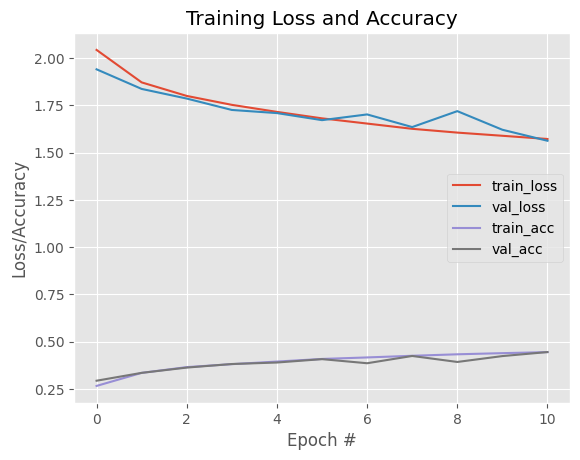

In [16]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()